In [1]:
# import module what you need
import os,sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from random import shuffle

from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import *
from keras.models import Sequential
from keras.models import load_model
from keras.layers import *
from keras.optimizers import *
from keras import utils as np_utils

# solve GPU problem
def solve_cudnn_error():
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            # Currently, memory growth needs to be the same across GPUs
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        except RuntimeError as e:
            # Memory growth must be set before GPUs have been initialized
            print(e)

solve_cudnn_error()


1 Physical GPUs, 1 Logical GPUs


In [2]:
#set variable
images=[]
labels=[]
name=[]


In [3]:
#make function for reading and processing data 
def read_images_labels(path,i):
    for file in os.listdir(path):
        abs_path=os.path.abspath(os.path.join(path,file))
        if os.path.isdir(abs_path):
            i+=1
            temp=os.path.split(abs_path)[-1]
            name.append(temp)
            read_images_labels(abs_path,i)
            amount=int(len(os.listdir(path)))
            sys.stdout.write('\r'+'>'*(i)+' '*(amount-i)+'[%s%%]'%(i*100/amount)+temp)
        else:
            if file.endswith('.jpg'):
                image = cv2.resize(cv2.imread(abs_path),(80,80))
                images.append(image)
                labels.append(i-1)
    return images, labels, name

def read_main(path):
    images, labels, name = read_images_labels(path,i=0)
    images=np.array(images,dtype=np.float32)/255
    labels=np_utils.to_categorical(labels, num_classes=20)
    np.savetxt('name.txt',name,delimiter=' ',fmt="%s")
    return images, labels ,name


In [4]:
#read and process data
images,labels,name=read_main('./machine-learning-ntut-2020-autumn-classification/train/characters-20')
X_train,X_test,Y_train,Y_test=train_test_split(images,labels,test_size=0.1)


>>>>>>>>>>>>>>>>>>>>[100.0%]comic_book_guyutenlonns

In [5]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(17593, 80, 80, 3)
(17593, 20)
(1955, 80, 80, 3)
(1955, 20)


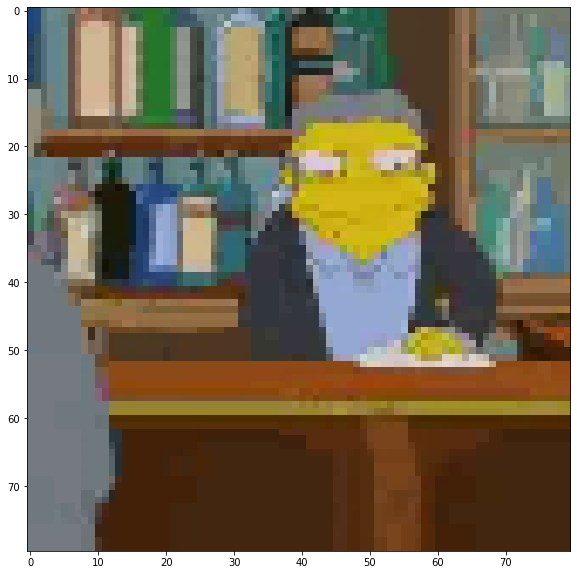

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(X_train[10][:,:,[2,1,0]])

In [7]:
#create model
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))
    
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))
    
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))
    
model.add(Flatten())

#model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
    
model.add(Dense(20, activation='softmax'))

#set model compile
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])

model.summary() # 秀出模型架構


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 80, 80, 128)       3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 80, 80, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 128)       147584    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0

In [8]:
epochs=50
batch_size=128

In [9]:
#save best_weight
filepath='best_weights.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy',
                             verbose=1,save_best_only=True,
                             mode='max',save_weights_only=False)
checkpoint_best = [checkpoint]

#train
history = model.fit(X_train, Y_train,batch_size=batch_size,
         epochs=epochs,validation_data=(X_test, Y_test),
         callbacks=checkpoint_best,shuffle=True,verbose=1)


Epoch 1/50
138/138 [==============================] - ETA: 0s - loss: 2.7902 - accuracy: 0.1392
Epoch 00001: val_accuracy improved from -inf to 0.23274, saving model to best_weights.hdf5
138/138 [==============================] - 32s 233ms/step - loss: 2.7902 - accuracy: 0.1392 - val_loss: 2.5462 - val_accuracy: 0.2327
Epoch 2/50
138/138 [==============================] - ETA: 0s - loss: 2.2411 - accuracy: 0.3125
Epoch 00002: val_accuracy improved from 0.23274 to 0.53657, saving model to best_weights.hdf5
138/138 [==============================] - 18s 130ms/step - loss: 2.2411 - accuracy: 0.3125 - val_loss: 1.7385 - val_accuracy: 0.5366
Epoch 3/50
138/138 [==============================] - ETA: 0s - loss: 1.5789 - accuracy: 0.5279
Epoch 00003: val_accuracy improved from 0.53657 to 0.64450, saving model to best_weights.hdf5
138/138 [==============================] - 18s 130ms/step - loss: 1.5789 - accuracy: 0.5279 - val_loss: 1.1749 - val_accuracy: 0.6445
Epoch 4/50
138/138 [===========

Epoch 27/50
138/138 [==============================] - ETA: 0s - loss: 0.1558 - accuracy: 0.9520
Epoch 00027: val_accuracy did not improve from 0.93811
138/138 [==============================] - 18s 134ms/step - loss: 0.1558 - accuracy: 0.9520 - val_loss: 0.2978 - val_accuracy: 0.9304
Epoch 28/50
138/138 [==============================] - ETA: 0s - loss: 0.1624 - accuracy: 0.9508
Epoch 00028: val_accuracy did not improve from 0.93811
138/138 [==============================] - 19s 135ms/step - loss: 0.1624 - accuracy: 0.9508 - val_loss: 0.2948 - val_accuracy: 0.9243
Epoch 29/50
138/138 [==============================] - ETA: 0s - loss: 0.1551 - accuracy: 0.9532
Epoch 00029: val_accuracy did not improve from 0.93811
138/138 [==============================] - 19s 137ms/step - loss: 0.1551 - accuracy: 0.9532 - val_loss: 0.2623 - val_accuracy: 0.9376
Epoch 30/50
138/138 [==============================] - ETA: 0s - loss: 0.1275 - accuracy: 0.9625
Epoch 00030: val_accuracy did not improve fro

In [10]:
models= model.load_weights(filepath)
#models = load_model('model_Simpson_'+str(epochs)+'_'+str(batch_size)+'.h5')
loss,acc = model.evaluate(X_test,Y_test,verbose=1)
print('loss:',loss,'acc:',acc)

#model.save('model_Simpson_'+str(epochs)+'_'+str(batch_size)+'.h5')


62/62 [==============================] - 5s 87ms/step - loss: 0.2213 - accuracy: 0.9540
loss: 0.22134269773960114 acc: 0.9539641737937927


62/62 [==============================] - 1s 9ms/step


<AxesSubplot:xlabel='Test', ylabel='Real'>

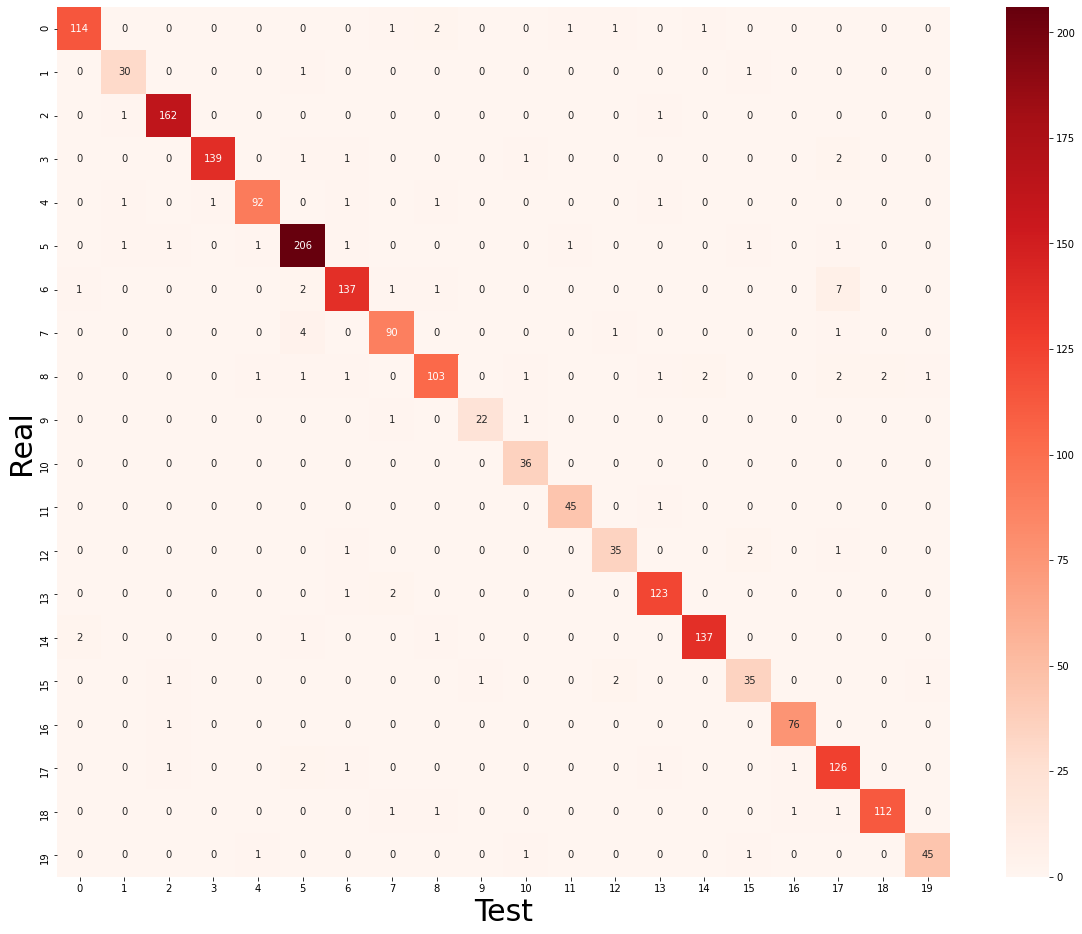

In [40]:
import pandas as pd 
import seaborn as sns
predictions = model.predict_classes(X_test,verbose=1) 
Y_true=Y_test.argmax(1)
confusion_matrix=pd.crosstab(Y_true, predictions, rownames=['Real'], colnames=['Test'])

plt.figure(figsize=(20,16))
plt.xlabel('Real', fontsize=30)
plt.ylabel('Test', fontsize=30)

sns.heatmap(confusion_matrix,annot=True,fmt='d',cmap='Reds')
#predictions

In [41]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


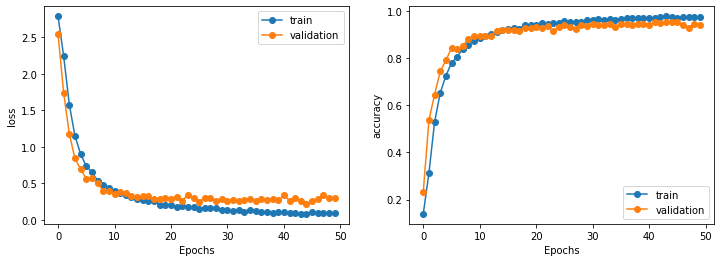

In [42]:
# 透過趨勢圖來觀察訓練與驗證的走向 (特別去觀察是否有"過擬合(overfitting)"的現象)
import matplotlib.pyplot as plt

def plot_train_history(history, train_metrics, val_metrics):
    plt.plot(history.history.get(train_metrics),'-o')
    plt.plot(history.history.get(val_metrics),'-o')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])
    
    
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_train_history(history, 'loss','val_loss')

plt.subplot(1,2,2)
plot_train_history(history, 'accuracy','val_accuracy')

plt.show()

In [44]:
#model_layer

for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    #if 'conv' not in layer.name:
        #continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)

0 conv2d (None, 80, 80, 128)
1 conv2d_1 (None, 80, 80, 128)
2 max_pooling2d (None, 26, 26, 128)
3 dropout (None, 26, 26, 128)
4 conv2d_2 (None, 26, 26, 128)
5 conv2d_3 (None, 26, 26, 128)
6 max_pooling2d_1 (None, 8, 8, 128)
7 dropout_1 (None, 8, 8, 128)
8 conv2d_4 (None, 8, 8, 64)
9 conv2d_5 (None, 8, 8, 64)
10 max_pooling2d_2 (None, 2, 2, 64)
11 dropout_2 (None, 2, 2, 64)
12 flatten (None, 256)
13 dropout_3 (None, 256)
14 dense (None, 20)


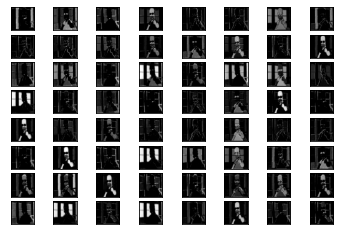

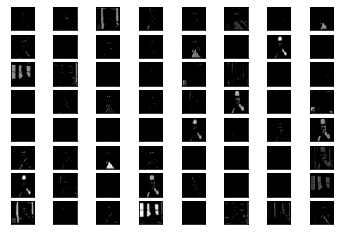

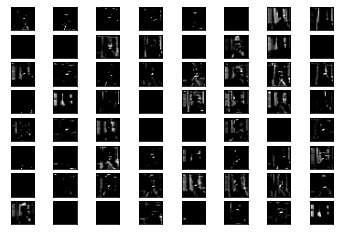

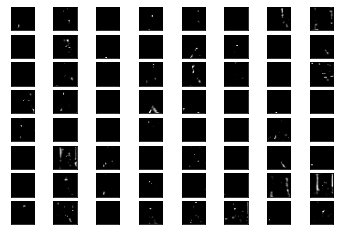

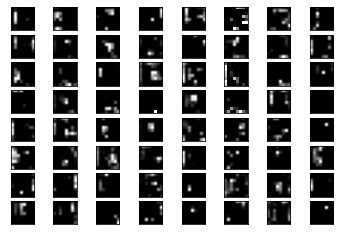

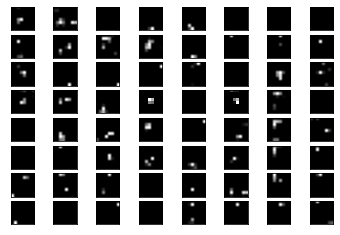

In [47]:
#make a feature_map
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

ixs = [0,1,4,5,8,9]
outputs = [model.layers[i].output for i in ixs]
model_feature = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('./machine-learning-ntut-2020-autumn-classification/train/characters-20/homer_simpson/pic_0006.jpg', target_size=(80, 80))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model_feature.predict(img)
# plot the output from each block
square = 8


for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
    
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.show()
    




In [19]:
import os 
DIR = 'machine-learning-ntut-2020-autumn-classification/test/test/' #要統計的資料夾
image_len=len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]) 
image_len

990

In [20]:
def read_images(path):
    test_images = []
    for i in range(image_len):
            img = cv2.resize(cv2.imread(path+str(i+1)+'.jpg'),(80,80))
            test_images.append(img)   
    test_images=np.array(test_images,dtype=np.float32)/255.
    return test_images

In [21]:
# 預測與比對
from keras.models import load_model

# 把訓練時val_loss最小的模型載入
model = load_model('model_Simpson_'+str(epochs)+"_"+str(batch_size)+'.h5')
test_img=read_images('./machine-learning-ntut-2020-autumn-classification/test/test/')
# 預測與比對
pred = model.predict_classes(test_img,verbose=1)
#acc = np.sum(y_pred==np.argmax(y_valtest, axis=1))/np.size(y_pred)
#print("Test accuracy = {}".format(acc))
pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
31/31 [==============================] - 6s 182ms/step


array([15, 10,  2,  2, 13,  6, 18,  5,  3,  1, 18,  9,  0,  6,  5, 18,  9,
       13,  1, 10, 13, 17, 13,  5, 17,  7,  9,  6,  1, 18,  1,  5, 11,  5,
        7,  5,  3,  8,  8, 18, 11,  8,  4,  2, 17, 12,  3, 11,  0, 16,  4,
        5,  1, 12,  6,  9, 17, 13, 15,  1, 14, 19, 14,  1, 10,  2,  1,  4,
       12, 14, 13,  8,  5, 19,  0, 14,  6, 18,  4,  1, 17, 16, 12,  9,  5,
        6, 13, 13, 16, 17, 15,  4, 16,  0,  0,  0, 10, 10, 13, 11, 13,  2,
       17, 14, 19, 16,  2, 13,  2,  3,  9,  0,  8,  0, 18,  1,  8, 12, 14,
        2, 11, 11,  4,  4,  6, 16,  3,  4,  6, 11, 16, 14, 18,  8,  5, 17,
        8,  8, 17,  3,  5,  0,  8, 11,  8, 11,  6,  1,  0, 10, 18,  7,  4,
       11,  9, 11,  1, 14,  5,  9, 18, 11, 11, 17, 19,  0,  3,  6, 16, 10,
       16, 11, 17, 11, 16,  4, 16,  0, 11,  4,  1,  8,  0, 11, 19, 10,  0,
       11,  6,  4,  2, 18,  3, 13, 18, 15, 11,  2, 14,  5, 16,  0,  7, 12,
        4,  4,  4, 15,  5,  1,  0,  0,  2, 11,  8, 11,  9,  7, 19,  3, 12,
        4,  3,  2, 18,  5

In [22]:
nametxt=np.loadtxt('name.txt',dtype='str')

name_label=[]
name_num=0
for i in nametxt:
    name_label.append([name_num,i])
    name_num+=1
name_label

[[0, 'principal_skinner'],
 [1, 'lenny_leonard'],
 [2, 'ned_flanders'],
 [3, 'marge_simpson'],
 [4, 'chief_wiggum'],
 [5, 'homer_simpson'],
 [6, 'lisa_simpson'],
 [7, 'abraham_grampa_simpson'],
 [8, 'charles_montgomery_burns'],
 [9, 'mayor_quimby'],
 [10, 'kent_brockman'],
 [11, 'apu_nahasapeemapetilon'],
 [12, 'edna_krabappel'],
 [13, 'krusty_the_clown'],
 [14, 'moe_szyslak'],
 [15, 'nelson_muntz'],
 [16, 'sideshow_bob'],
 [17, 'bart_simpson'],
 [18, 'milhouse_van_houten'],
 [19, 'comic_book_guy']]

In [23]:
new_pred=[]
for i in range(len(pred)):
    new_pred.append(name_label[pred[i]][1])
new_pred

['nelson_muntz',
 'kent_brockman',
 'ned_flanders',
 'ned_flanders',
 'krusty_the_clown',
 'lisa_simpson',
 'milhouse_van_houten',
 'homer_simpson',
 'marge_simpson',
 'lenny_leonard',
 'milhouse_van_houten',
 'mayor_quimby',
 'principal_skinner',
 'lisa_simpson',
 'homer_simpson',
 'milhouse_van_houten',
 'mayor_quimby',
 'krusty_the_clown',
 'lenny_leonard',
 'kent_brockman',
 'krusty_the_clown',
 'bart_simpson',
 'krusty_the_clown',
 'homer_simpson',
 'bart_simpson',
 'abraham_grampa_simpson',
 'mayor_quimby',
 'lisa_simpson',
 'lenny_leonard',
 'milhouse_van_houten',
 'lenny_leonard',
 'homer_simpson',
 'apu_nahasapeemapetilon',
 'homer_simpson',
 'abraham_grampa_simpson',
 'homer_simpson',
 'marge_simpson',
 'charles_montgomery_burns',
 'charles_montgomery_burns',
 'milhouse_van_houten',
 'apu_nahasapeemapetilon',
 'charles_montgomery_burns',
 'chief_wiggum',
 'ned_flanders',
 'bart_simpson',
 'edna_krabappel',
 'marge_simpson',
 'apu_nahasapeemapetilon',
 'principal_skinner',
 's

In [28]:
test_num=0
while True:
    filepath='./test'+'('+str(test_num)+')'+'.csv'
    if os.path.isfile(filepath):
        test_num+=1
    else:
        with open('./test'+'('+str(test_num)+')'+'.csv','w+') as ans:
            ans.write('id,character\n')
            id=1
            for i in range(len(new_pred)):
                ans.write(str(id)+','+new_pred[i]+'\n')
                id+=1
        break
print('The End')


The End
